In [1]:
import numpy as np
from numpy.linalg import inv
%matplotlib inline
import matplotlib.pyplot as plt
rng = np.random.default_rng(123)

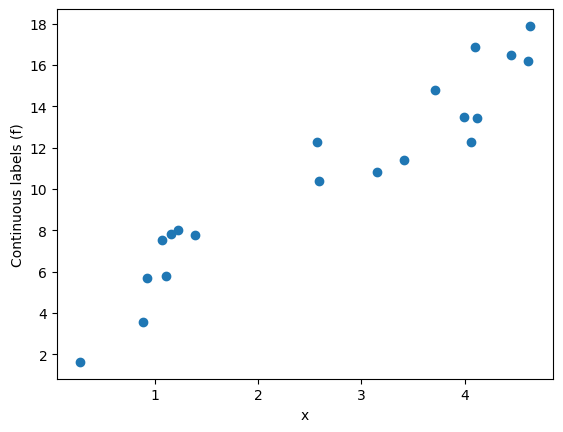

In [2]:
x = 5 * rng.random(20)
f = 3 * x + 5 * rng.random(20)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [3]:
X = np.array([np.ones(len(x)), x]).T
a = inv(X.T @ X) @ X.T @ f # Create the "model"

In [4]:
x_predict = np.linspace(0, 5, num=100)
f_predict = a[0] + a[1] * x_predict # "Predict" using the model

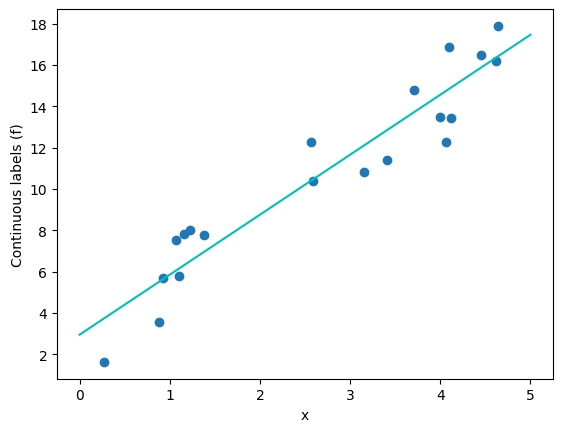

In [5]:
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(x_predict, f_predict, 'c');

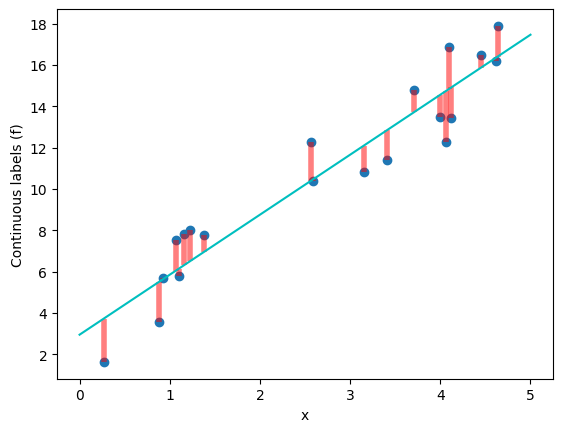

In [6]:
from matplotlib.collections import LineCollection
fp = X @ a
plt.scatter(x, f)
lc = LineCollection([[(x[i], f[i]), (x[i], fp[i])]

for i in range(len(x))], color='r', linewidth=4,alpha=0.5)
plt.gca().add_collection(lc)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(x_predict, f_predict, 'c');

In [7]:
linear_example = {'data': [x, f], 'model': a}

In [8]:
x1 = 5 * rng.random(100)
x2 = 5 * rng.random(100)
f = 10 - (3*x1 + 2* x2 + 2 * rng.random(100))

In [9]:
X = np.array([np.ones(len(x1)), x1, x2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

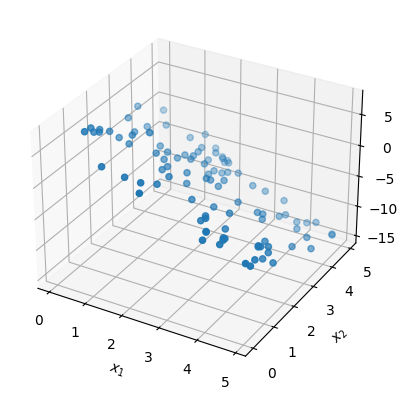

In [10]:
x1 = 5 * rng.random(100)
x2 = 5 * rng.random(100)
f = 10 - (3*x1 + 2* x2 + 2 * rng.random(100))
X = np.array([np.ones(len(x1)), x1, x2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f
from mpl_toolkits.mplot3d import Axes3D
ax = plt.figure().add_subplot( projection='3d')
ax.scatter(x1, x2, f)
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$');

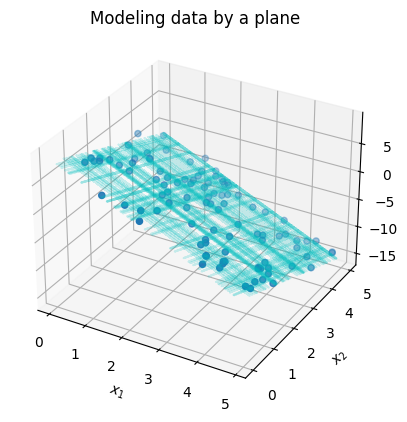

In [11]:
ax = plt.figure().add_subplot( projection='3d')
ax.set_xlabel('$x_1$'); ax.set_ylabel('$x_2$')
xx1, xx2 = np.meshgrid(x1, x2)
zz = a[0] + a[1] * xx1 + a[2] * xx2
ax.plot_wireframe(xx1, xx2, zz, color='c', alpha=0.2)
ax.scatter(x1, x2, f); ax.set_title('Modeling data by a plane');

In [12]:
planar_example = {'data': [np.array([x1, x2]).T, f], 'model': a}

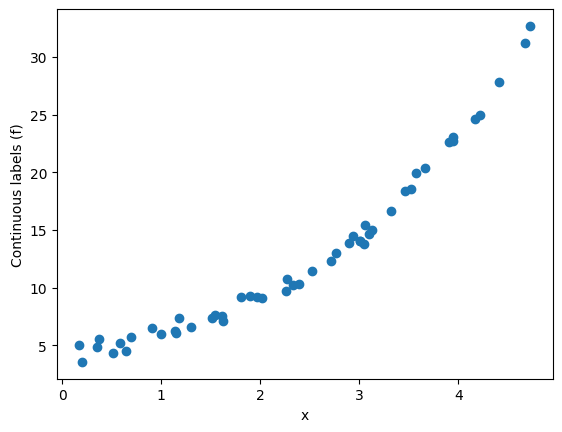

In [13]:
x = 5 * rng.random(50)
f = 3 * np.exp(x/2) + 2 * rng.random(50)
plt.scatter(x, f); plt.xlabel('x'); plt.ylabel('Continuous labels (f)');

In [14]:
phi0 = np.ones(len(x))
phi1 = x
phi2 = x**2
X = np.array([phi0, phi1, phi2]).T
a = np.linalg.inv(X.T @ X) @ X.T @ f

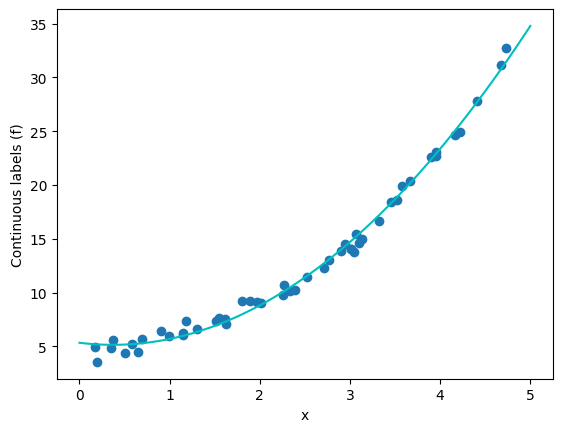

In [15]:
xcurve_predict = np.linspace(0, 5, num=500)
phi0 = np.ones(len(xcurve_predict))
phi1 = xcurve_predict
phi2 = xcurve_predict**2
fcurve_predict = a[0] * phi0 + a[1] * phi1 + a[2] * phi2
plt.scatter(x, f)
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xcurve_predict, fcurve_predict, 'c');

In [16]:
curve_example = {'data': [x, f], 'model': a, 'type': 'quadratic'}

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

In [18]:
x, f = linear_example['data'] # Recall the saved data from the first example
model.fit(x[:, np.newaxis], f) # Training step

LinearRegression()

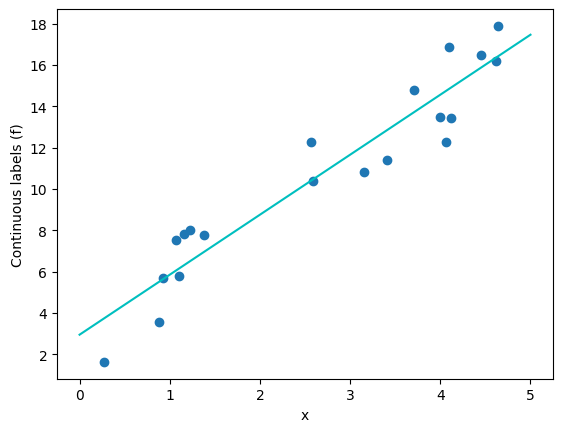

In [19]:
xfit = np.linspace(0, 5, num=100)
ffit = model.predict(xfit[:, np.newaxis]) # Prediction step
plt.scatter(x, f);
plt.xlabel('x'); plt.ylabel('Continuous labels (f)');
plt.plot(xfit, ffit, 'c');

In [20]:
model.intercept_, model.coef_

(2.9548137487468367, array([2.90310325]))

In [21]:
linear_example['model']

array([2.95481375, 2.90310325])

In [22]:
x12, f = planar_example['data']
model.fit(x12, f)

LinearRegression()

In [23]:
model.intercept_, model.coef_

(8.829811944006206, array([-2.9328621 , -2.00298202]))

In [24]:
planar_example['model']

array([ 8.82981194, -2.9328621 , -2.00298202])

In [25]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [26]:
q = PolynomialFeatures(3, include_bias=False)

In [27]:
data = np.array([5, 7, 9])[:, np.newaxis]
q.fit_transform(data)

array([[  5.,  25., 125.],
       [  7.,  49., 343.],
       [  9.,  81., 729.]])

In [28]:
x, y = curve_example['data'] # load data from the prior example
# make model/pipeline and fit the data to it:
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(x[:, np.newaxis], y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

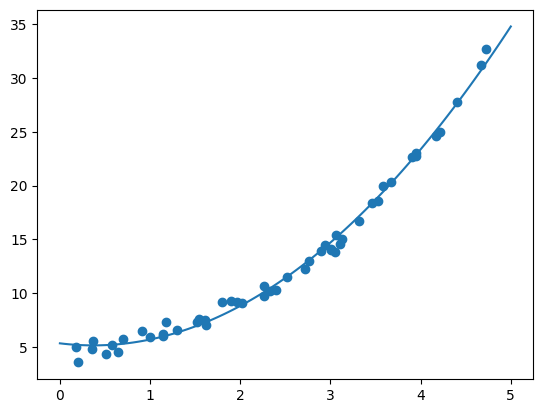

In [29]:
yfit = quadratic_model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [30]:
quadratic_model.named_steps

{'polynomialfeatures': PolynomialFeatures(),
 'linearregression': LinearRegression()}

In [31]:
quadratic_model.named_steps['linearregression'].intercept_

5.344479408450292

In [32]:
quadratic_model.named_steps['linearregression'].coef_

array([ 0.        , -1.02746188,  1.38335143])

In [33]:
curve_example['model'] # previously saved results from first principles

array([ 5.34447941, -1.02746188,  1.38335143])